In [2]:
from log_prob_comp import log_prob_comparison, get_ones, read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [3]:
ones = get_ones(flatten=True)

In [4]:
means, sigmas = read_csv()

In [5]:
%%time
disc_scores = []
int_scores_ub = []
int_scores_lb = []
for one in ones:
    disc_score, int_score = log_prob_comparison(one, means, sigmas)
    ub, lb = int_score
    disc_scores.append(disc_score)
    int_scores_ub.append(ub)
    int_scores_lb.append(lb)

CPU times: user 13.7 s, sys: 7.43 ms, total: 13.7 s
Wall time: 13.7 s


In [6]:
n = len(disc_scores)
xs = np.arange(n)

In [7]:
int_scores_lb[:5]

[-811274.230668059,
 -660550.4791954058,
 -632410.1037150057,
 -267092.6668737637,
 -659600.9867046982]

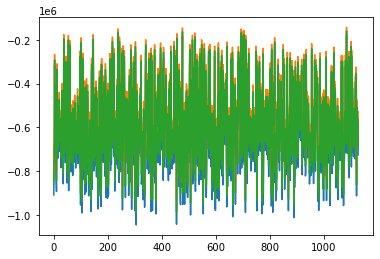

In [8]:
plt.plot(int_scores_ub)
plt.plot(int_scores_lb)
plt.plot(disc_scores)

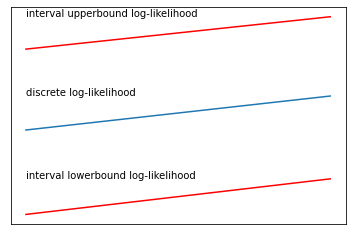

In [135]:
a,b = np.polyfit(xs, int_scores_lb, 1)
plt.plot(xs, a*xs+b, color='red', label='t')
plt.annotate('interval upperbound log-likelihood', xy=(0,np.max(a*xs+b)), xycoords='data')

a,b = np.polyfit(xs, int_scores_ub, 1)
plt.plot(xs, a*xs+b, color='red')
plt.annotate('interval lowerbound log-likelihood', xy=(0,np.max(a*xs+b)), xycoords='data')

a,b = np.polyfit(xs, disc_scores, 1)
plt.plot(xs, a*xs+b)
plt.annotate('discrete log-likelihood', xy=(0,np.max(a*xs+b)), xycoords='data')

#get current axes
ax = plt.gca()

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis
ax.get_yaxis().set_visible(False)

plt.savefig('loglikelihood.png')